 #https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/code<br>
 # IMDB DATA ANALYSIS

### Basic Information about Dataset

Poster_Link- Link of the poster that imbd movie using<br>
Series_Title -Name of the movie<br>
Released_Year - year in which that movie was released<br>
Certificate	- certificate earned by that movie<br>
Runtime	- total duration of the movie<br>
Genre - genre of movie<br>
IMDB_Rating - rating at imbd website<br>
Overview - summary of that movie<br>
Meta_score                      <br>
Director - Name of director<br>
Star1, Star2, Star3, Star4 - name of star<br>
No_of_Votes-Total votes<br>
Gross - revenue of that movie

##### Data Shape
No of rows 1000<br>
no of columns 15

# Objective of the project

- To make a content based **Movie Recommendation System** which gives recommedation on the basis of genre
- To analyze data to Answer Questions like:
    - In which year most number of movies released?
    - In which year Drama movies earns most?
    - What is the average Imdb - Rating over 100 years?
    - Top 5 Rated Movies According To Votes
    - Top rated movies on the basis of Meta score
    - In which certificate most number of movies released?
    - Most Popular Genre
    - What is the average duration of movies?
    - Which movie has the maximum runtime?
    - Which Star is making the most number of movies?

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import string

import warnings
warnings.filterwarnings('ignore')

##### Loading the dataset

In [2]:
filename='imdb_top_1000.csv'
data=pd.read_csv(filename)
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
data.shape

(1000, 16)

So our Data has 1000 rows and 16 columns

### Explore Data

In [4]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


There are 3 columns with null values

### Data Cleaning

In [6]:
print("IS their is any missing values? ",data.isnull().values.any())

IS their is any missing values?  True


In [7]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

<AxesSubplot:>

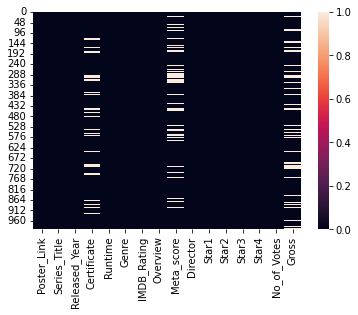

In [8]:
#visualizing missing values
sns.heatmap(data.isnull())

In [9]:
#Total null value in null column
missing=data.isnull().sum()
missing=missing[missing>0]
missing.sort_values()

Certificate    101
Meta_score     157
Gross          169
dtype: int64

<AxesSubplot:>

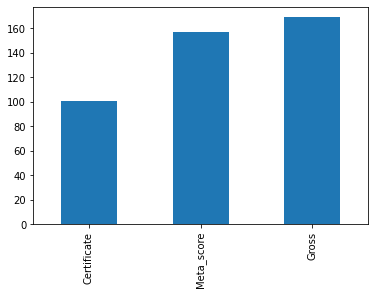

In [10]:
#Ploting the null values
missing.plot.bar()

so our dataset has three variables having missing values<br>
i.e certificate<br>
    Meta_score<br>
    Gross

In [11]:
#finding percentage of missing values
per_missing = data.isnull().sum()*100/len(data)
per_missing

Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

### LETS IMPUTING DATA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [13]:
# filling the Certificate column with most occuring rating
data['Certificate'] = data['Certificate'].fillna(data['Certificate'].mode())

# filling the meta_score column with mean value
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].mean())

# filling the Certificate column with most occuring rating
data["Certificate"] = data["Certificate"].fillna(data["Certificate"].mode()[0])


In [14]:
data['Gross'] = data['Gross'].str.replace(',', '').astype('float')

In [15]:
data['Gross'] = data['Gross'].fillna(data['Gross'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [16]:
# since poster link and movie overview is not of use,so i drop both columns from my datasets
df=data
df.drop(['Poster_Link'],axis=1,inplace= True)
df.drop(['Overview'],axis=1,inplace= True)

In [17]:
data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.834147e+07
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1.349664e+08
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,5.730000e+07
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4.360000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,6.803475e+07
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,6.803475e+07
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,3.050000e+07
998,Lifeboat,1944,U,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,6.803475e+07


### Checking for duplicate data

In [18]:
dup_data=data.duplicated().any()

In [19]:
print("Is their is any Duplicate values? ",dup_data)

Is their is any Duplicate values?  False


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 109.5+ KB


# EDA on the dataset

In [21]:
df['Released_Year'].sort_values().unique()

array(['1920', '1921', '1922', '1924', '1925', '1926', '1927', '1928',
       '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
       '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945',
       '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', 'PG'], dtype=object)

In [22]:
#Counting the number of years in the dataset
count = 0
for i in df["Released_Year"].unique():
    count += 1
print(count)

100


In [23]:
#Counting the number of moives yearwise
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

### In which year most number of movies released?

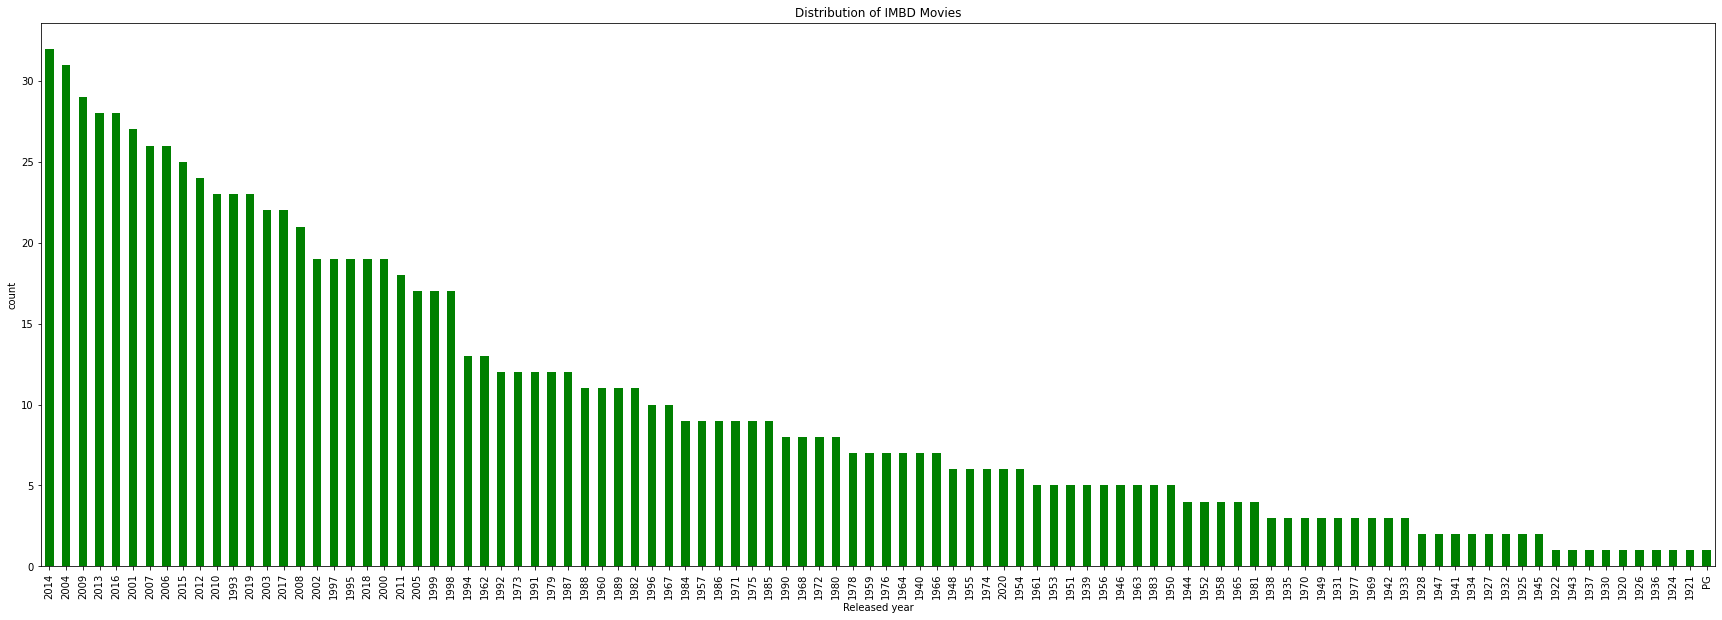

In [24]:
df['Released_Year'].value_counts().plot.bar(figsize=(30,10),color='green',title='Distribution of IMBD Movies',xlabel='Released year',ylabel="count")
plt.show()

- From the graph we can easily see that in year **2014(32) most number of movies released** which is followed by 2004(31)

In [25]:
#Pair of unique genre
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [26]:
# Movies directed by every director
df['Director'].value_counts()

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

In [27]:
count = 0
for i in df["Director"].unique():
    count += 1
print(count)

548


In [28]:
#Performance of director
director_performance = df.groupby("Director").Gross.agg([len,np.mean,min,max,sum])

In [29]:
director_performance.head()

,len,mean,min,max,sum
Director,,,,,
Aamir Khan,1,1.223869e+06,1.223869e+06,1.223869e+06,1.223869e+06
Aaron Sorkin,1,6.803475e+07,6.803475e+07,6.803475e+07,6.803475e+07
Abdellatif Kechiche,1,2.199675e+06,2.199675e+06,2.199675e+06,2.199675e+06
Abhishek Chaubey,1,6.803475e+07,6.803475e+07,6.803475e+07,6.803475e+07
Abhishek Kapoor,1,1.122527e+06,1.122527e+06,1.122527e+06,1.122527e+06


#### In which year Drama movies earns most

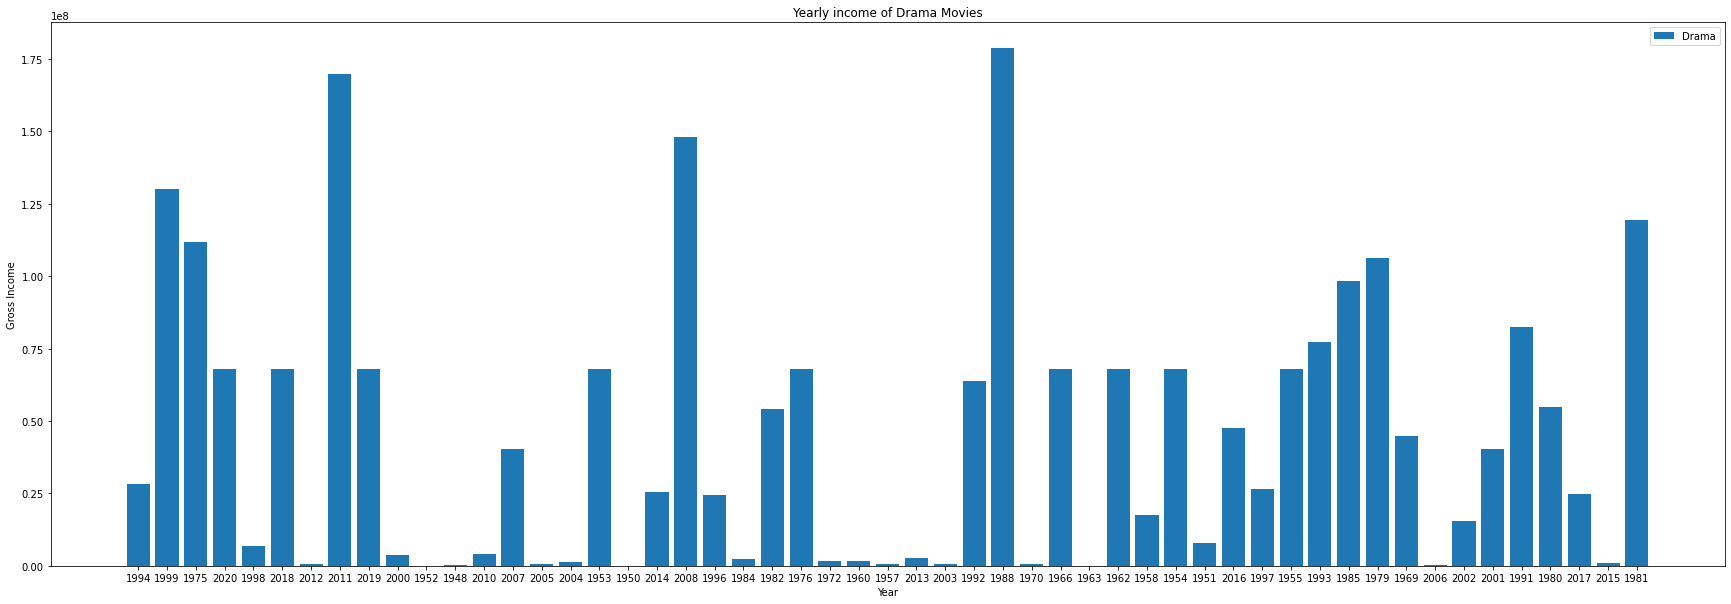

In [30]:
fig ,ax = plt.subplots(figsize = (30,10))
plt.bar(df[df["Genre"]=="Drama"]["Released_Year"],df[df["Genre"]=="Drama"]["Gross"],label = 'Drama',)
ax.set(title = "Yearly income of Drama Movies",
       xlabel = "Year",
       ylabel = "Gross Income")
plt.legend();

- In **1988** and **2011** gross collection for drama movies is the most

In [31]:
pip install wordcloud



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


### Wordcloud for Directors

from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
text=" ".join(df['Director'])
WC=WordCloud(width=1000,height=500,background_color='white', max_words=500,min_font_size=5)
words=WC.generate(text)
plt.imshow(words,interpolation='bilinear')
plt.axis('off')
plt.show

plt.figure(figsize=(15,15))
text=" ".join(df['Star1'])
WC=WordCloud(width=1000,height=500,background_color='white', max_words=500,min_font_size=5)
words=WC.generate(text)
plt.imshow(words,interpolation='bilinear')
plt.axis('off')
plt.show

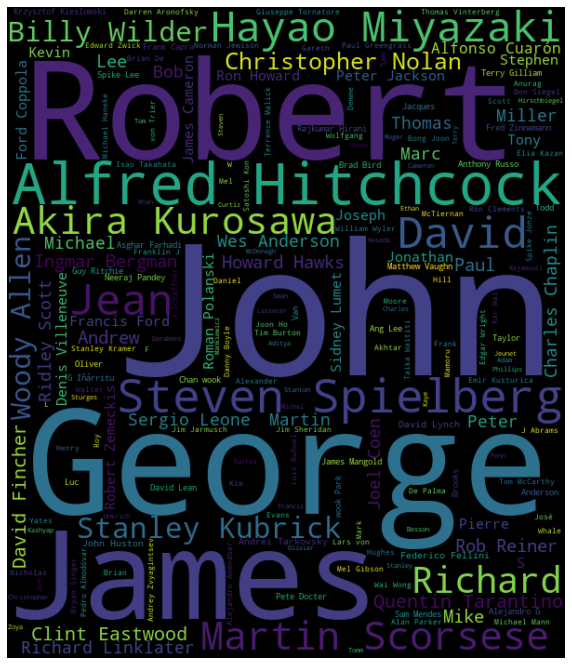

In [32]:
# Making wordcloud for the directors
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(
    background_color = "black",
    height = 700,
    width = 600)

#Converting pd dataframe into text file
wc.generate(' '.join(df["Director"]))

plt.figure(figsize= (10,15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Which actor make the most number of movies?

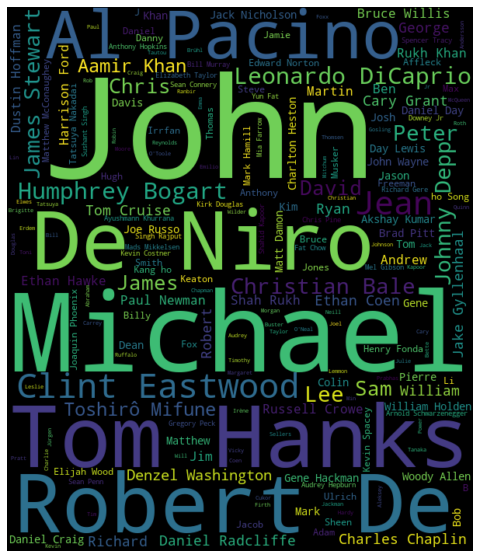

In [33]:
# Making wordcloud for the Star1
wc = WordCloud(
    background_color = "black",
    height = 700,
    width = 600)

#Converting pd dataframe into text file
wc.generate(' '.join(df["Star1"]))

plt.figure(figsize= (10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

- **Tom Hanks** makes the most number of movies

### What is the average Imdb - Rating over 100 years?

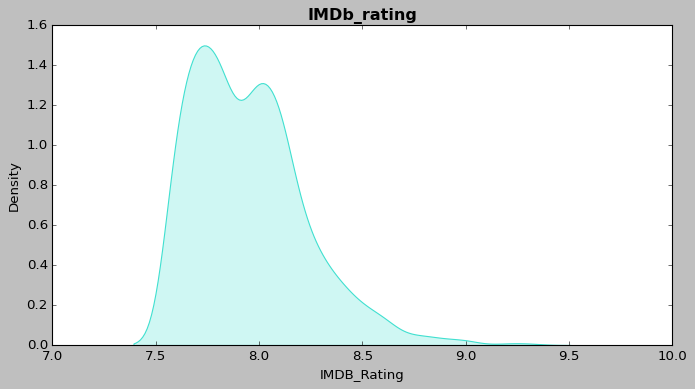

In [34]:
plt.style.use('classic')
ax ,fig = plt.subplots(figsize = (10,5))
sns.kdeplot(df["IMDB_Rating"],color = "turquoise" , shade = True)
plt.title("IMDb_rating",fontweight = "bold");

- from the plot we can conclude that average imdb-rating is between  **7.7** to **8**

In [35]:
# plt.figure(figsize=(10,5))
# G=df['IMDB_Rating'].hist(edgecolor="black")
# G.set_title('IMBD_RATING',fontsize=15,fontweight="bold")


In [36]:
# plt.figure(figsize=(10,5))
# G=df['Meta_score'].hist(edgecolor="black")
# G.set_title('Meta_score',fontsize=15,fontweight="bold")


In [37]:
# plt.figure(figsize=(10,5))
# G=df['Gross'].hist(edgecolor="black")
# G.set_title('Gross',fontsize=15,fontweight="bold")

#### TOP 5 RATED MOVIES ACCORDING TO VOTES

In [38]:
top_voted=df.sort_values(['No_of_Votes'], ascending=False)

Text(0.5, 1.0, 'TOP 5 MOVIES')

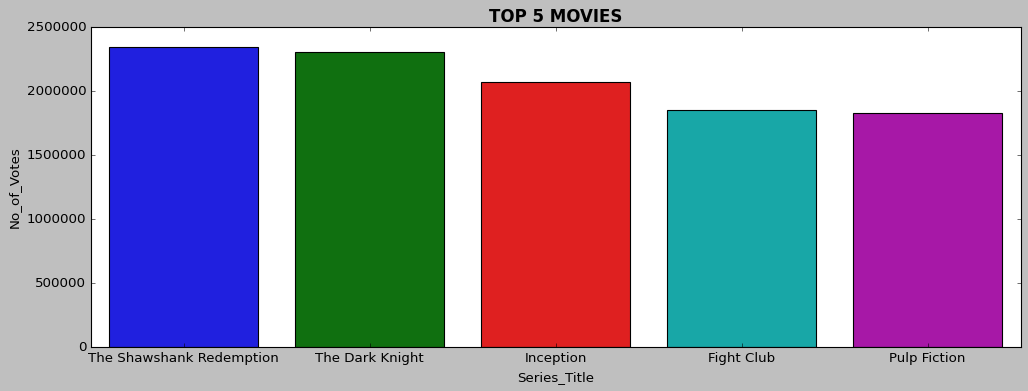

In [39]:
plt.figure(figsize=(15,5))
splot=sns.barplot(x=top_voted['Series_Title'][ :5],y=top_voted['No_of_Votes'][:5])
splot.set_title("TOP 5 MOVIES",fontsize=15,fontweight="bold")

- Top rated movie on the basis of votes is **The Shawshank Redemption**

### Top rated movies on the basis of Meta score

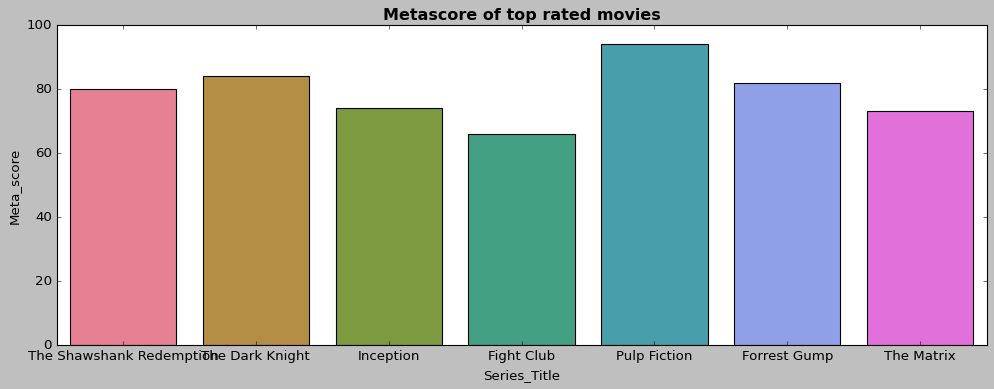

In [40]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

- Top rated movie on the basis of Metascore is **Pulp Fiction**

In [41]:
# fig,axs=plt.subplots(figsize=(15,5))
# g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
# g.set_title("Gross by top rated movies", weight = "bold")
# plt.show()

In [42]:
# highest_earning = data.sort_values(['Gross'], ascending = False)
# fig,axs=plt.subplots(figsize=(23,5))
# g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
# g.set_title("Movies with highest Gross", weight = "bold")
# plt.show()

In [43]:
# fig,axs=plt.subplots(figsize=(20,5))
# g=sns.barplot(x=data['Released_Year'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
# g.set_title("Maximum Series released in-", weight = "bold")
# g.set_xlabel("Years")
# plt.show()

## CERTIFICATE

### Top movies by gross

In [44]:
df['Certificate'].unique

<bound method Series.unique of 0           A
1           A
2          UA
3           A
4           U
        ...  
995         A
996         G
997    Passed
998         U
999         U
Name: Certificate, Length: 1000, dtype: object>

## In which certificate most number of movies released?

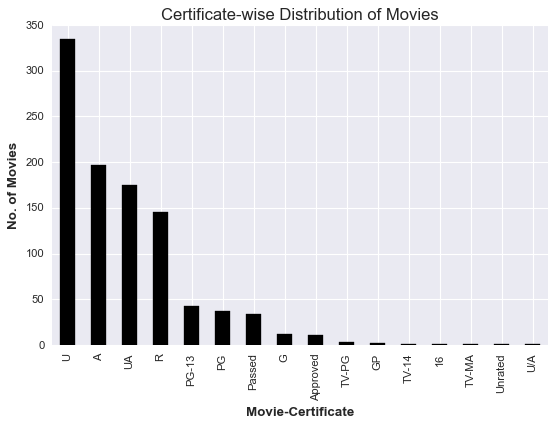

In [45]:
plt.style.use( 'seaborn')
fig,ax = plt.subplots(figsize = (8,5))
df["Certificate"].value_counts().plot.bar(color = "BLack");
plt.title("Certificate-wise Distribution of Movies",fontsize = 15)
plt.xlabel("Movie-Certificate" , fontsize = 12, fontweight = "bold")
plt.ylabel("No. of Movies",fontsize = 12 , fontweight = "bold")
plt.show();

- **U certificare** has most **no of movies** over the past 100 years

## RATING

In [46]:
# df.sort_values(ascending=False, by = 'IMDB_Rating').head(10)
# fig, ax = plt.subplots(figsize = (25,8))
# plt.bar(df['Series_Title'].head(10) , df['IMDB_Rating'].head(10),color = 'black' )
# ax.set(title = 'IMBD Movies-IMDB_Rating',
#        xlabel = 'SERIES TITLE',
#        ylabel = 'Imdb Rating')
# plt.show();
# plot.bar(figsize=(30,10),color='green',title='IMBD Movies-IMDB_Rating',xlabel='SERIES TITLE',ylabel="Imbd Rating")
# plt.show()

## Genre

In [47]:
# df['Genre'].value_counts().head(10).plot.bar(figsize=(30,10),color='red',title='IMBD Movies-Genre',xlabel='Genre',ylabel="count")
# plt.show()

In [48]:
df['Genre'].unique()[:10]

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama'], dtype=object)

so I'm going to split multiple category of a movie into single category by considering the left genre as main genre<br>
for instance: 'crime,drama' only leave crime as main genre

In [49]:
df['genre'] = df['Genre'].apply(lambda text: text.split(',')[0])
df.drop(columns='Genre', inplace=True)
df['genre'].value_counts()

Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: genre, dtype: int64

### Most Popular Genre 

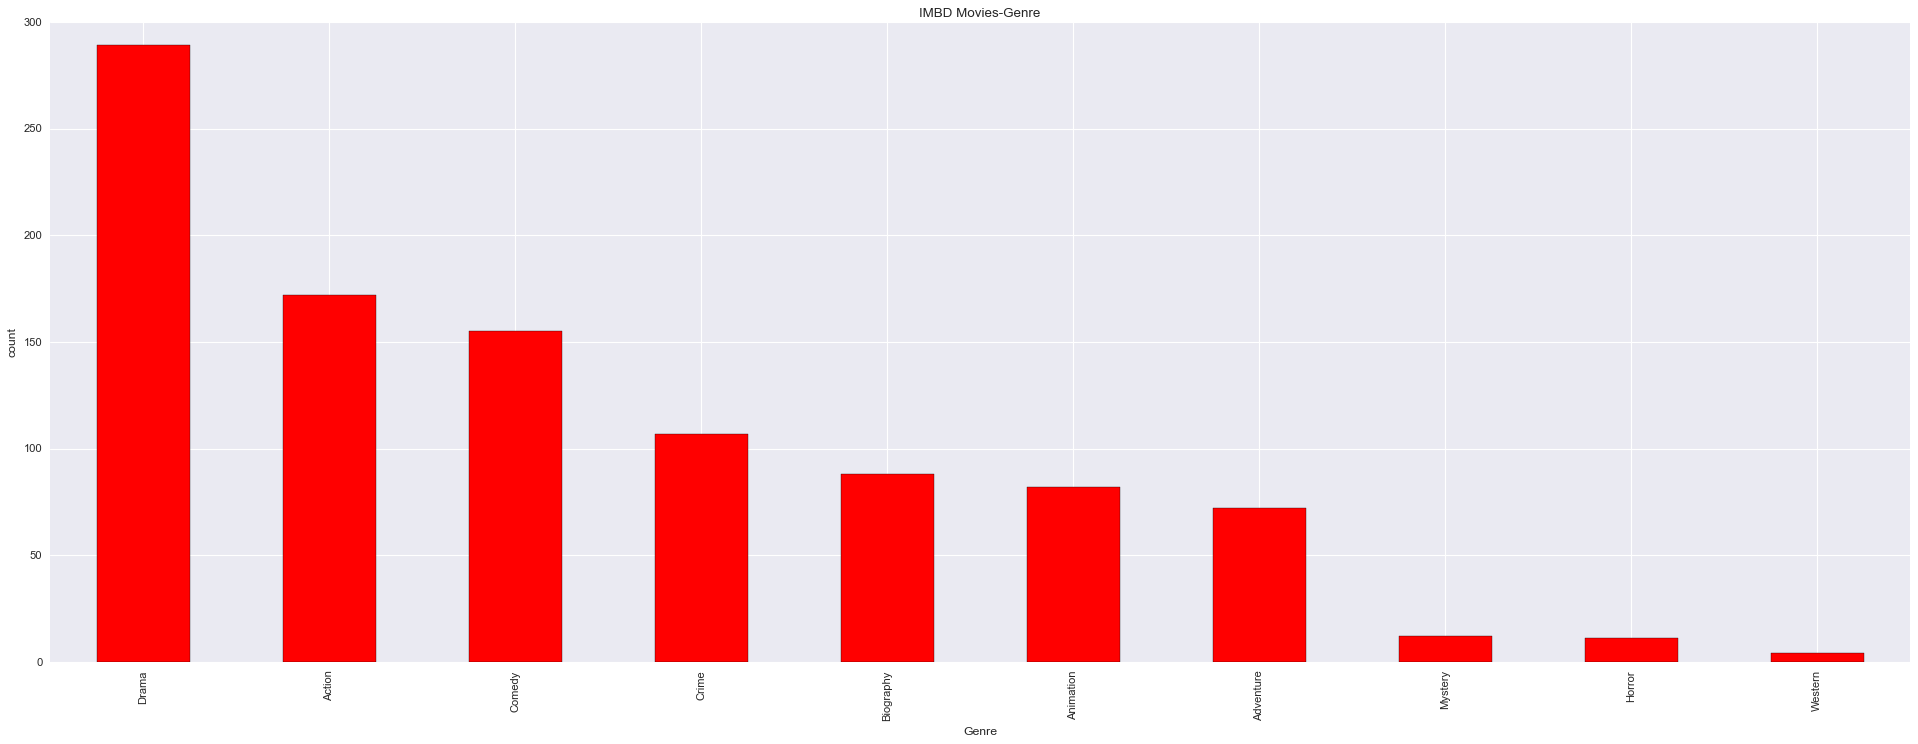

In [50]:
df['genre'].value_counts().head(10).plot.bar(figsize=(30,10),color='red',title='IMBD Movies-Genre',xlabel='Genre',ylabel="count")
plt.show()

- **Drama** is the most popular Genre

### RUNTIME

In [51]:
list = []
for i in df['Runtime']:
    list.append((int(i.split()[0])))
#     print(df['Run'])
# print(list)
run = pd.Series(list)
run
df['Runtime_of_movies']= run

In [52]:
df['Runtime_of_movies']

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime_of_movies, Length: 1000, dtype: int64

### What is the average duration of movies?

Text(0.5, 1.0, 'Time Duration of movies')

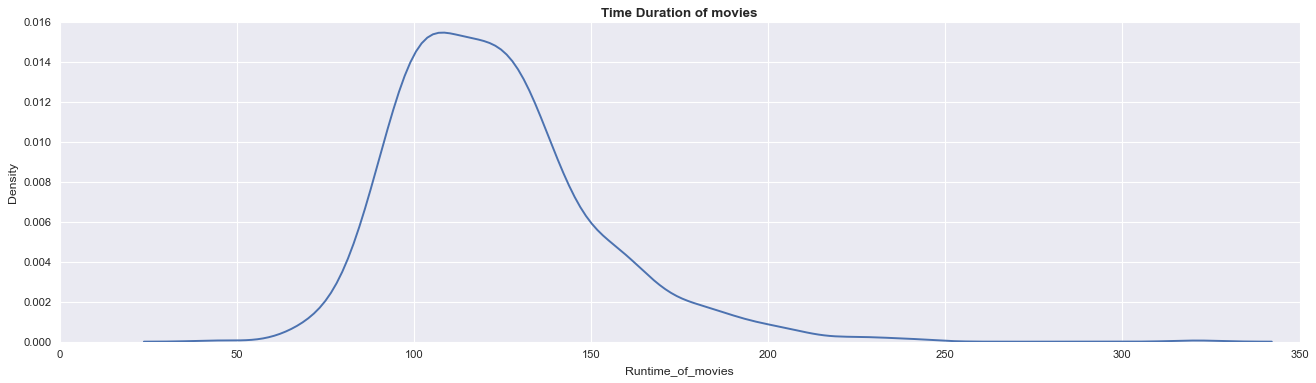

In [53]:
fig,axs= plt.subplots(figsize=(20,5))
g=sns.kdeplot(df['Runtime_of_movies'])
g.set_title("Time Duration of movies", weight = "bold")

- Average duration of movies is around **110 to 130 minutes**

In [54]:
max_runtime=df.sort_values(['Runtime_of_movies'], ascending=False)
max_runtime


,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre,Runtime_of_movies
140,Gangs of Wasseypur,2012,A,321 min,8.2,89.00000,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui,Tigmanshu Dhulia,82365,6.803475e+07,Action,321
812,Hamlet,1996,PG-13,242 min,7.7,77.97153,Kenneth Branagh,Kenneth Branagh,Julie Christie,Derek Jacobi,Kate Winslet,35991,4.414535e+06,Drama,242
314,Gone with the Wind,1939,U,238 min,8.1,97.00000,Victor Fleming,George Cukor,Sam Wood,Clark Gable,Vivien Leigh,290074,1.986765e+08,Drama,238
71,Once Upon a Time in America,1984,A,229 min,8.4,77.97153,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,Treat Williams,311365,5.321508e+06,Crime,229
116,Lawrence of Arabia,1962,U,228 min,8.3,100.00000,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,4.482414e+07,Adventure,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Duck Soup,1933,U,69 min,7.8,93.00000,Leo McCarey,Groucho Marx,Harpo Marx,Chico Marx,Zeppo Marx,55581,6.803475e+07,Comedy,69
127,The Kid,1921,Passed,68 min,8.3,77.97153,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5.450000e+06,Comedy,68
320,The General,1926,Passed,67 min,8.1,77.97153,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1.033895e+06,Action,67
567,Freaks,1932,U,64 min,7.9,80.00000,Tod Browning,Wallace Ford,Leila Hyams,Olga Baclanova,Roscoe Ates,42117,6.803475e+07,Drama,64


## Which movie has the maximum runtime?

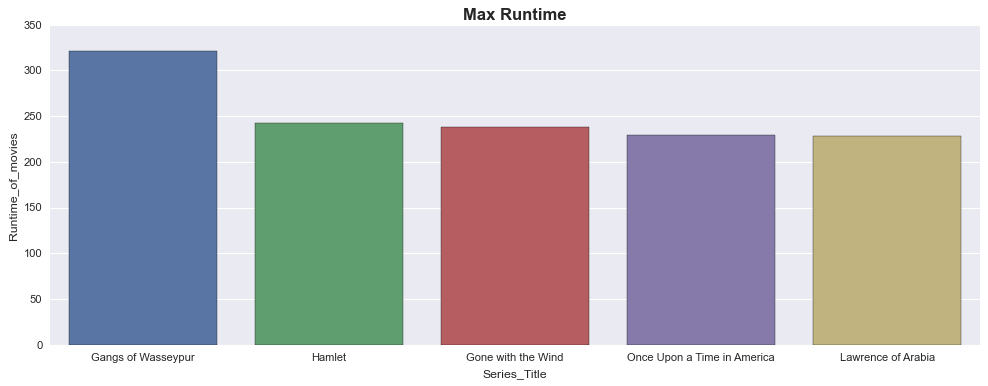

In [55]:
plt.figure(figsize=(15,5))
splot2=sns.barplot(x=max_runtime['Series_Title'][ :5],y=max_runtime['Runtime_of_movies'][:5])
splot2.set_title("Max Runtime",fontsize=15,fontweight="bold");

- **Gang of wasseypur** is a movie with the maximum runtime 

In [56]:
# ax = sns.distplot(df['Gross'])

In [57]:
# ax = sns.distplot(df['Meta_score'])

## IMBD Movies Stars

### Which Star is making the most number of movies?

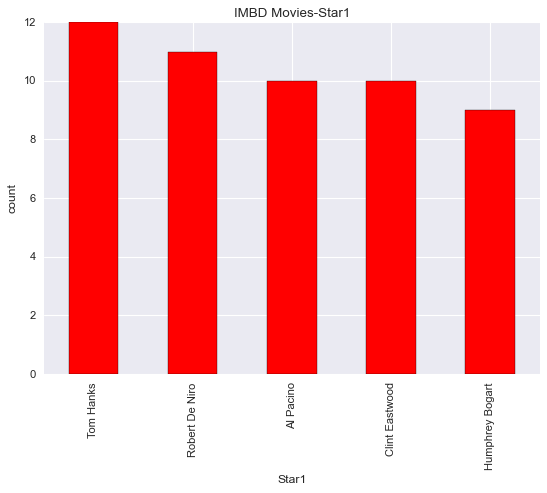

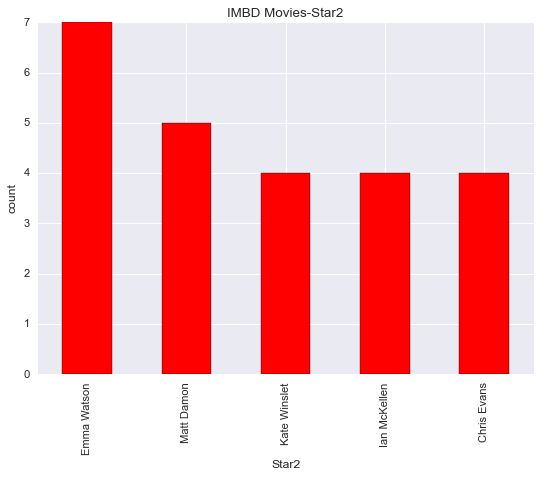

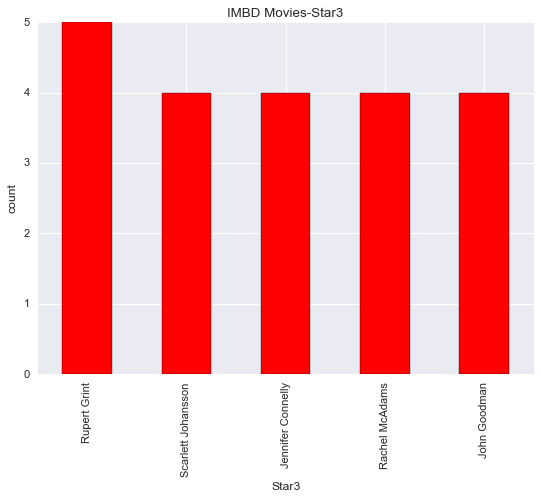

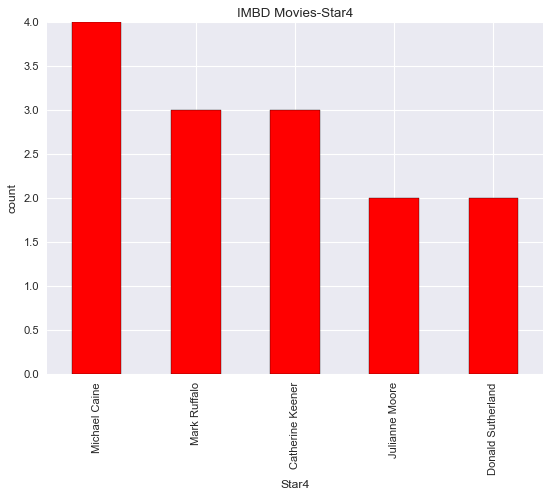

In [58]:
roles=['Star1','Star2','Star3','Star4']
for star in roles:
     plt.figsize=(30,10)
     df[star].value_counts().head(5).plot.bar(color='red',title=f'IMBD Movies-{star}',xlabel=f'{star}',ylabel="count")
     plt.show()

- In lead role **Tom Hanks** has done 12 movies
- In supporting role **Emma Watson** has done 7 movies
- In supporting role 1 **Rupert Grint** has done 5 movies
- In supporting role 2 **Micheal Caine** has done 4 movies 

<AxesSubplot:>

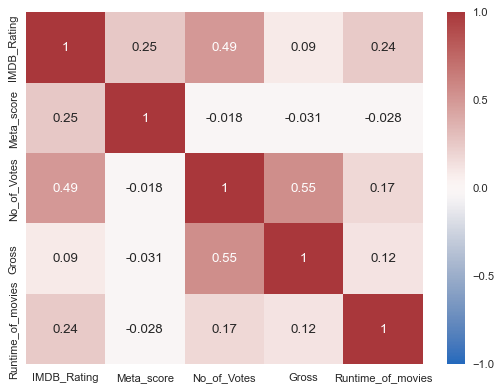

In [59]:
sns.heatmap(df.corr(),annot=True, cmap="vlag", vmin=-1)

## Genre wise correlation

<AxesSubplot:title={'center':'Crime'}>

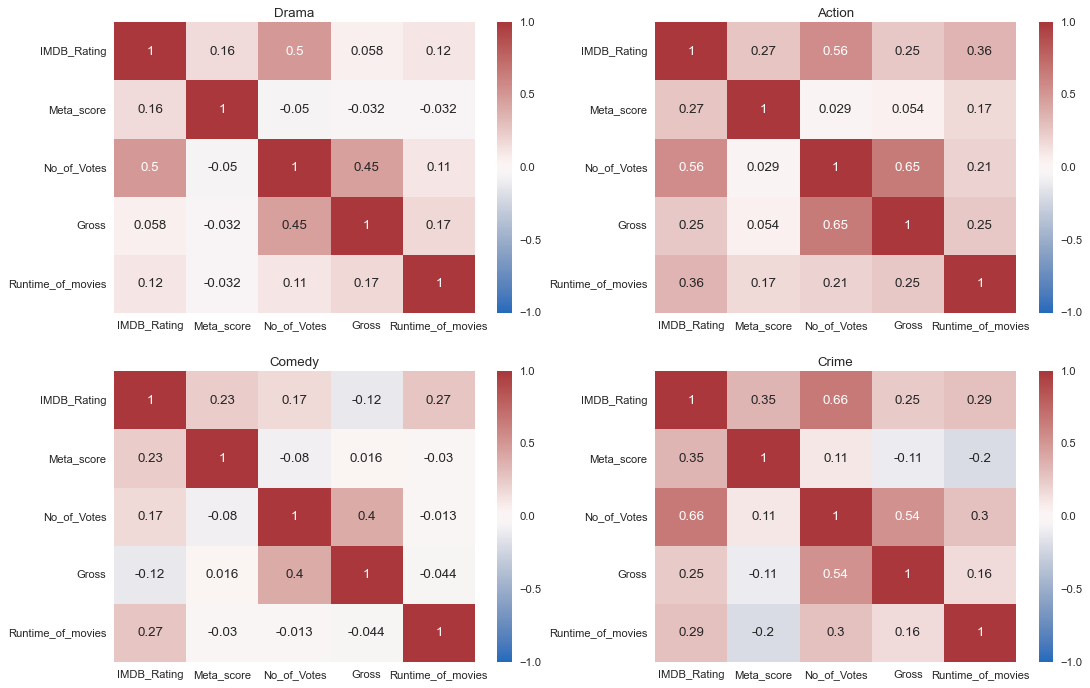

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
# For Drama series
axs[0, 0].set_title('Drama')
sns.heatmap(df[df['genre']=='Drama'].corr(),annot=True, cmap="vlag", vmin=-1,ax=axs[0,0])

# For Action movies
axs[0, 1].set_title('Action')
sns.heatmap(df[df['genre']=='Action'].corr(),annot=True, cmap="vlag", vmin=-1,ax=axs[0,1])

#For Comedy movies
axs[1, 0].set_title('Comedy')
sns.heatmap(df[df['genre']=='Comedy'].corr(),annot=True, cmap="vlag", vmin=-1,ax=axs[1,0])

#For Crime movies
axs[1, 1].set_title('Crime')
sns.heatmap(df[df['genre']=='Crime'].corr(),annot=True, cmap="vlag", vmin=-1,ax=axs[1,1])

In [61]:
pip install sklearn


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Recommendation system

In [62]:
import sklearn

In [63]:
data= pd.read_csv('imdb_top_1000.csv')
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [64]:
data.describe(include='all')

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,NaN,Two imprisoned men bond over a number of years...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [65]:
#finding percentage of missing values
per_missing = data.isnull().sum()*100/len(data)
per_missing

Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [66]:
#Imputing missing values of certificate column
data['Certificate'] = data['Certificate'].fillna(data['Certificate'].mode()[0])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


## Feature Selection

We won't use all the columns or features for this notebook. So then, the recommendation that we give to the users will only<br>
consider the information contained in the following columns:<br>


In [68]:
new_data=data[['Series_Title','Certificate','Genre','Overview','Director','Star1','Star2','Star3','Star4']]
new_data.set_index('Series_Title', inplace=True)
new_data

,Certificate,Genre,Overview,Director,Star1,Star2,Star3,Star4
Series_Title,,,,,,,,
The Shawshank Redemption,A,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
The Godfather,A,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
The Dark Knight,UA,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
The Godfather: Part II,A,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
12 Angry Men,U,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
...,...,...,...,...,...,...,...,...
Breakfast at Tiffany's,A,"Comedy, Drama, Romance",A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen
Giant,G,"Drama, Western",Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker
From Here to Eternity,Passed,"Drama, Romance, War","In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed


In [69]:
data['cast'] = data['Star1']+ ' '+data['Star2']+ ' '+data['Star3']+ ' '+data['Star4']
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,cast
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Tim Robbins Morgan Freeman Bob Gunton William ...
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Marlon Brando Al Pacino James Caan Diane Keaton
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Christian Bale Heath Ledger Aaron Eckhart Mich...
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Al Pacino Robert De Niro Robert Duvall Diane K...
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Henry Fonda Lee J. Cobb Martin Balsam John Fie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,Audrey Hepburn George Peppard Patricia Neal Bu...
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,Elizabeth Taylor Rock Hudson James Dean Carrol...
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",Burt Lancaster Montgomery Clift Deborah Kerr D...
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,U,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,Tallulah Bankhead John Hodiak Walter Slezak Wi...


In [70]:
new_data=data[['Series_Title','Certificate','Genre','Overview','Director','cast']]
new_data.set_index('Series_Title', inplace=True)
new_data.head(3)

,Certificate,Genre,Overview,Director,cast
Series_Title,,,,,
The Shawshank Redemption,A,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins Morgan Freeman Bob Gunton William ...
The Godfather,A,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando Al Pacino James Caan Diane Keaton
The Dark Knight,UA,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale Heath Ledger Aaron Eckhart Mich...


In [71]:
new_data['Genre']= new_data["Genre"].str.replace(',','')
#new_data['Genre']= new_data["Genre"].str.replace(' ','')
new_data['Genre'] = new_data['Genre'].str.lower()

new_data['Overview'] = new_data['Overview'].str.replace(',', '')[0]
new_data['Overview'] = new_data['Overview'].str.replace('.', '')[0]
new_data['Overview'] = new_data['Overview'].str.replace('"', '')[0]
#new_data['Overview'] = new_data['Overview'].str.replace(' ','')
new_data['Overview'] = new_data['Overview'].str.lower()

# because there are more than 1 people who shared common 1st or last name
# we dont want to consider as same
#new_data['Director']= new_data["Director"].str.replace(' ','')
new_data['Director']= new_data["Director"].str.lower()

#new_data['cast']= new_data["cast"].str.replace(' ','')
new_data['cast']= new_data["cast"].str.lower()

new_data

,Certificate,Genre,Overview,Director,cast
Series_Title,,,,,
The Shawshank Redemption,A,drama,two imprisoned men bond over a number of years...,frank darabont,tim robbins morgan freeman bob gunton william ...
The Godfather,A,crime drama,two imprisoned men bond over a number of years...,francis ford coppola,marlon brando al pacino james caan diane keaton
The Dark Knight,UA,action crime drama,two imprisoned men bond over a number of years...,christopher nolan,christian bale heath ledger aaron eckhart mich...
The Godfather: Part II,A,crime drama,two imprisoned men bond over a number of years...,francis ford coppola,al pacino robert de niro robert duvall diane k...
12 Angry Men,U,crime drama,two imprisoned men bond over a number of years...,sidney lumet,henry fonda lee j. cobb martin balsam john fie...
...,...,...,...,...,...
Breakfast at Tiffany's,A,comedy drama romance,two imprisoned men bond over a number of years...,blake edwards,audrey hepburn george peppard patricia neal bu...
Giant,G,drama western,two imprisoned men bond over a number of years...,george stevens,elizabeth taylor rock hudson james dean carrol...
From Here to Eternity,Passed,drama romance war,two imprisoned men bond over a number of years...,fred zinnemann,burt lancaster montgomery clift deborah kerr d...


In [72]:
new_data['words'] = new_data['Certificate']+ ' ' +new_data['Genre']+' '+new_data['Overview']+' '+new_data['Director']+' '+new_data['cast']

In [73]:
new_data.drop(['Certificate','Genre','Overview','Director','cast'],axis=1)

,words
Series_Title,
The Shawshank Redemption,A drama two imprisoned men bond over a number ...
The Godfather,A crime drama two imprisoned men bond over a n...
The Dark Knight,UA action crime drama two imprisoned men bond ...
The Godfather: Part II,A crime drama two imprisoned men bond over a n...
12 Angry Men,U crime drama two imprisoned men bond over a n...
...,...
Breakfast at Tiffany's,A comedy drama romance two imprisoned men bond...
Giant,G drama western two imprisoned men bond over a...
From Here to Eternity,Passed drama romance war two imprisoned men bo...


In [74]:
 new_data['words']['The Godfather']

'A crime drama two imprisoned men bond over a number of years finding solace and eventual redemption through acts of common decency francis ford coppola marlon brando al pacino james caan diane keaton'

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['words'])

In [77]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.        , 0.05875185, 0.05764078, ..., 0.0515893 , 0.11220199,
        0.04855745],
       [0.05875185, 1.        , 0.07587703, ..., 0.05217047, 0.05641428,
        0.06521573],
       [0.05764078, 0.07587703, 1.        , ..., 0.05118385, 0.05534741,
        0.06398241],
       ...,
       [0.0515893 , 0.05217047, 0.05118385, ..., 1.        , 0.08520872,
        0.04311804],
       [0.11220199, 0.05641428, 0.05534741, ..., 0.08520872, 1.        ,
        0.17117972],
       [0.04855745, 0.06521573, 0.06398241, ..., 0.04311804, 0.17117972,
        1.        ]])

In [78]:
final_df = data[['Series_Title', 'Genre']]

final_df

,Series_Title,Genre
0,The Shawshank Redemption,Drama
1,The Godfather,"Crime, Drama"
2,The Dark Knight,"Action, Crime, Drama"
3,The Godfather: Part II,"Crime, Drama"
4,12 Angry Men,"Crime, Drama"
...,...,...
995,Breakfast at Tiffany's,"Comedy, Drama, Romance"
996,Giant,"Drama, Western"
997,From Here to Eternity,"Drama, Romance, War"
998,Lifeboat,"Drama, War"


In [79]:
def recommendation(Series_Title, total_result=5, threshold=0.5):
    # Get the index
    idx = final_df[final_df['Series_Title'] == Series_Title].index[0]
    # Create a new column for similarity, the value is different for each title you input
    final_df['similarity'] = cosine_sim[idx]
    sort_final_df = final_df.sort_values(by='similarity', ascending=False)[1:total_result+1]
    
    # You can set a threshold if you want to norrow the result down 
    #sort_final_df = sort_final_df[sort_final_df['similarity'] > threshold]
    
#     Is the title a movie or tv show?
    movies = sort_final_df['Series_Title']
    
    if len(movies) != 0:
        print('Similar Movie(s) list:')
        for i, movie in enumerate(movies):
            print('{}. {}'.format(i+1, movie))
        print()
    else:
        print('Similar Movie(s) list:')
        print('-\n')
        
#     if len(tv_shows) != 0:
#         print('Similar TV_show(s) list:')
#         for i, tv_show in enumerate(tv_shows):
#             print('{}. {}'.format(i+1, tv_show))
#     else:
#         print('Similar TV_show(s) list:')
#         print('-')



In [80]:
recommendation('Dil Bechara')

Similar Movie(s) list:
1. Chhichhore
2. Kai po che!
3. M.S. Dhoni: The Untold Story
4. 3 Idiots
5. Jab We Met



In [81]:
recommendation('3 Idiots')

Similar Movie(s) list:
1. Rang De Basanti
2. PK
3. Andaz Apna Apna
4. Munna Bhai M.B.B.S.
5. Taare Zameen Par



In [82]:
recommendation('Rang De Basanti')

Similar Movie(s) list:
1. 3 Idiots
2. Dil Chahta Hai
3. Taare Zameen Par
4. Bhaag Milkha Bhaag
5. Andaz Apna Apna



## 2nd approch

In [83]:
from itertools import combinations

In [84]:
#Making all the possible combination of Genre
tf = TfidfVectorizer(analyzer=lambda s: (c for i in range(1,4)
                                             for c in combinations(s.split(','), r=i)))
#Using .fit_transform function to assign a vector for every possible genre and the matrix we get is sparse matrix
#As we have 1000 movies so these movies name become row of this matrix and combination of genre becomes the column of matrix
#Now every row which is a movie is uniquely defined by the vectors(different pairs of Genre) 
tfidf_matrix = tf.fit_transform(data['Genre'])
tfidf_matrix.shape

(1000, 383)

In [85]:
tf.get_feature_names()

[(' Action',),
 (' Action', ' Adventure'),
 (' Action', ' Crime'),
 (' Action', ' Drama'),
 (' Action', ' Fantasy'),
 (' Action', ' Sci-Fi'),
 (' Adventure',),
 (' Adventure', ' Biography'),
 (' Adventure', ' Comedy'),
 (' Adventure', ' Crime'),
 (' Adventure', ' Drama'),
 (' Adventure', ' Family'),
 (' Adventure', ' Fantasy'),
 (' Adventure', ' History'),
 (' Adventure', ' Horror'),
 (' Adventure', ' Mystery'),
 (' Adventure', ' Romance'),
 (' Adventure', ' Sci-Fi'),
 (' Adventure', ' Thriller'),
 (' Adventure', ' War'),
 (' Adventure', ' Western'),
 (' Biography',),
 (' Biography', ' Crime'),
 (' Biography', ' Drama'),
 (' Comedy',),
 (' Comedy', ' Crime'),
 (' Comedy', ' Drama'),
 (' Comedy', ' Family'),
 (' Comedy', ' Fantasy'),
 (' Comedy', ' Film-Noir'),
 (' Comedy', ' Mystery'),
 (' Comedy', ' Romance'),
 (' Comedy', ' Sci-Fi'),
 (' Comedy', ' War'),
 (' Crime',),
 (' Crime', ' Comedy'),
 (' Crime', ' Drama'),
 (' Crime', ' Mystery'),
 (' Crime', ' Romance'),
 (' Crime', ' Sport

In [86]:
#Printing the sparse matrix
tfidf_matrix
print(tfidf_matrix)

  (0, 308)	1.0
  (1, 284)	0.6650169368768254
  (1, 41)	0.3686059234580064
  (1, 283)	0.6495245544693709
  (2, 134)	0.4876299067649064
  (2, 36)	0.4120954148882777
  (2, 137)	0.3884840706763626
  (2, 132)	0.4291870466818684
  (2, 34)	0.3567811879734534
  (2, 108)	0.30027174226086706
  (2, 41)	0.19954226007440176
  (3, 284)	0.6650169368768254
  (3, 41)	0.3686059234580064
  (3, 283)	0.6495245544693709
  (4, 284)	0.6650169368768254
  (4, 41)	0.3686059234580064
  (4, 283)	0.6495245544693709
  (5, 113)	0.5294362411786026
  (5, 10)	0.4904472973950137
  (5, 109)	0.3683456067353351
  (5, 6)	0.31359157243574914
  (5, 137)	0.3629149395859427
  (5, 108)	0.280508544435922
  (5, 41)	0.18640884588566015
  (6, 284)	0.6650169368768254
  :	:
  (995, 278)	0.4395721925753043
  (995, 256)	0.35047074041538684
  (995, 249)	0.3096363719361691
  (995, 95)	0.3327677644156728
  (995, 41)	0.19832078273752235
  (996, 355)	0.7244062379076794
  (996, 107)	0.630735341638969
  (996, 308)	0.2782238869831554
  (997, 346

First we convert our sparse matrix into a dense matrix using .todense() function


Now we make a dataframe of this matrix

In [87]:
pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(), index=data.Series_Title).sample(5, axis=1).sample(10, axis=0)

,"( Crime, Mystery)","(Action, Drama, History)","(Comedy, Fantasy)","(Drama, Thriller)","( Action,)"
Series_Title,,,,,
Stalker,0.0,0.0,0.0,0.000000,0.0
Dil Chahta Hai,0.0,0.0,0.0,0.000000,0.0
Good Will Hunting,0.0,0.0,0.0,0.000000,0.0
One Flew Over the Cuckoo's Nest,0.0,0.0,0.0,0.000000,0.0
"Swades: We, the People",0.0,0.0,0.0,0.000000,0.0
Le scaphandre et le papillon,0.0,0.0,0.0,0.000000,0.0
Idi i smotri,0.0,0.0,0.0,0.338813,0.0
Andhadhun,0.0,0.0,0.0,0.000000,0.0
Mission: Impossible - Fallout,0.0,0.0,0.0,0.000000,0.0


- We use cosine Similarity to calculate the similarity between the movies. 
- Make a similarity dataframe where rows as well as column are movie and value show how similar a movie to another movie.

In [88]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [89]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Series_Title'], columns=data['Series_Title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).round(2)

Shape: (1000, 1000)


Series_Title,Ed Wood,En man som heter Ove,Bronenosets Potemkin,Per qualche dollaro in più,No Country for Old Men
Series_Title,,,,,
The Shawshank Redemption,0.00,0.00,0.18,0.0,0.00
The Godfather,0.06,0.07,0.00,0.0,0.52
The Dark Knight,0.03,0.04,0.00,0.0,0.04
The Godfather: Part II,0.06,0.07,0.00,0.0,0.52
12 Angry Men,0.06,0.07,0.00,0.0,0.52
...,...,...,...,...,...
Breakfast at Tiffany's,0.03,1.00,0.00,0.0,0.04
Giant,0.00,0.00,0.05,0.0,0.00
From Here to Eternity,0.00,0.09,0.03,0.0,0.00


In [90]:
def genre_recommendations(i, M, items, k=10):
    """
    Recommends movies based on a similarity dataframe

    Parameters
    ----------
    i : str
        Movie (index of the similarity dataframe)
    M : pd.DataFrame0
        Similarity dataframe, symmetric, with movies as indices and columns
    items : pd.DataFrame
        Contains both the title and some other features used to define similarity
    k : int
        Amount of recommendations to return

    """
    
    
    """we are assigning 10+1 most similar movie index to ix. Suppose we have a 5x5 matrix and 3idiots 
    is one of the movies then 3 idiots should on the column also and we want 2 most similar movie of 3 idiots. 
    So, 3idiots also similar  to itself and has similarity equal to 1. That's why are taking index of 2+1 movies""" 
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    
    #We get the movie name from the index and dropping the index with similarity value 1 and assign it to closest
    closest = M.columns[ix[-1:-(k+2):-1]]
    
#     closest = closest.drop(i, errors='ignore')

    #Return the closet as dataframe
    return pd.DataFrame(closest).merge(items).head(k)

In [91]:
genre_recommendations('Dil Bechara', cosine_sim_df, data[['Series_Title', 'Genre']])

,Series_Title,Genre
0,Barfi!,"Comedy, Drama, Romance"
1,Trois couleurs: Blanc,"Comedy, Drama, Romance"
2,His Girl Friday,"Comedy, Drama, Romance"
3,The Graduate,"Comedy, Drama, Romance"
4,Jeux d'enfants,"Comedy, Drama, Romance"
5,Sabrina,"Comedy, Drama, Romance"
6,Jab We Met,"Comedy, Drama, Romance"
7,The Apartment,"Comedy, Drama, Romance"
8,Good Bye Lenin!,"Comedy, Drama, Romance"
9,The Quiet Man,"Comedy, Drama, Romance"


In [92]:
genre_recommendations('3 Idiots', cosine_sim_df, data[['Series_Title', 'Genre']])

,Series_Title,Genre
0,Being There,"Comedy, Drama"
1,C.R.A.Z.Y.,"Comedy, Drama"
2,Perfetti sconosciuti,"Comedy, Drama"
3,Secrets & Lies,"Comedy, Drama"
4,"Planes, Trains & Automobiles","Comedy, Drama"
5,The Truman Show,"Comedy, Drama"
6,The Breakfast Club,"Comedy, Drama"
7,Guess Who's Coming to Dinner,"Comedy, Drama"
8,Withnail & I,"Comedy, Drama"
9,The Station Agent,"Comedy, Drama"


In [93]:
genre_recommendations('PK', cosine_sim_df, data[['Series_Title', 'Genre']])

,Series_Title,Genre
0,Munna Bhai M.B.B.S.,"Comedy, Drama, Musical"
1,Kal Ho Naa Ho,"Comedy, Drama, Musical"
2,PK,"Comedy, Drama, Musical"
3,Singin' in the Rain,"Comedy, Musical, Romance"
4,Dancer in the Dark,"Crime, Drama, Musical"
5,A Hard Day's Night,"Comedy, Music, Musical"
6,A Night at the Opera,"Comedy, Music, Musical"
7,Me and Earl and the Dying Girl,"Comedy, Drama"
8,Birdman or (The Unexpected Virtue of Ignorance),"Comedy, Drama"
9,Chhichhore,"Comedy, Drama"
